In [253]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

## Data Exploaration

In [203]:
# Loading Training and Testing Data set
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [204]:
df.shape

(1460, 81)

In [205]:
df_test.shape

(1459, 80)

Here the test dataset has only 80 columns, while train dataset has 81 columnns. This is due to the fact that the test data do not include the final sale price information

In [206]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [207]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [209]:
# Display the count of null values if exists in training set, in descending order

series = df.isnull().sum().sort_values(ascending=False)
for index, value in series.items() :
    if value > (df.shape[0] > 0) :
        print(str(index)+" : "+str(value))

PoolQC : 1453
MiscFeature : 1406
Alley : 1369
Fence : 1179
FireplaceQu : 690
LotFrontage : 259
GarageCond : 81
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
BsmtExposure : 38
BsmtFinType2 : 38
BsmtFinType1 : 37
BsmtCond : 37
BsmtQual : 37
MasVnrArea : 8
MasVnrType : 8


We have 5 features with high NaN values. 
- PoolQC 
- MiscFeature 
- Alley 
- Fence 
- FireplaceQu 

It is highly probable that these features won’t provide us with any useful insight on the dataset so we can consider removing them.

In [210]:
# Display the count of null values if exists in testing set, in descending order

series = df_test.isnull().sum().sort_values(ascending=False)
for index, value in series.items() :
    if value > (df_test.shape[0] > 0) :
        print(str(index)+" : "+str(value))

PoolQC : 1456
MiscFeature : 1408
Alley : 1352
Fence : 1169
FireplaceQu : 730
LotFrontage : 227
GarageCond : 78
GarageQual : 78
GarageYrBlt : 78
GarageFinish : 78
GarageType : 76
BsmtCond : 45
BsmtQual : 44
BsmtExposure : 44
BsmtFinType1 : 42
BsmtFinType2 : 42
MasVnrType : 16
MasVnrArea : 15
MSZoning : 4
BsmtHalfBath : 2
Utilities : 2
Functional : 2
BsmtFullBath : 2


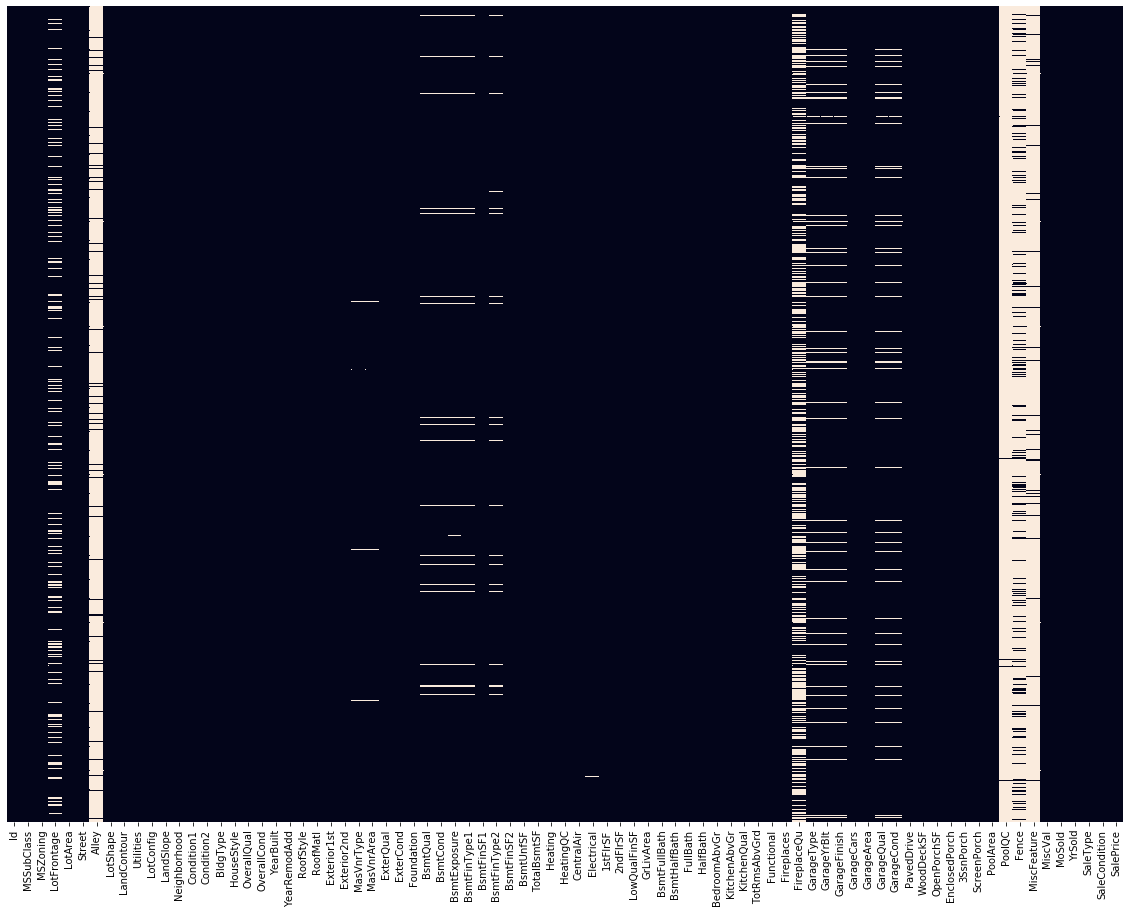

In [211]:
# Visual representation of Null values using the Heat map
plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [212]:
# Calculate the correlation between the features and the target
corr = df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


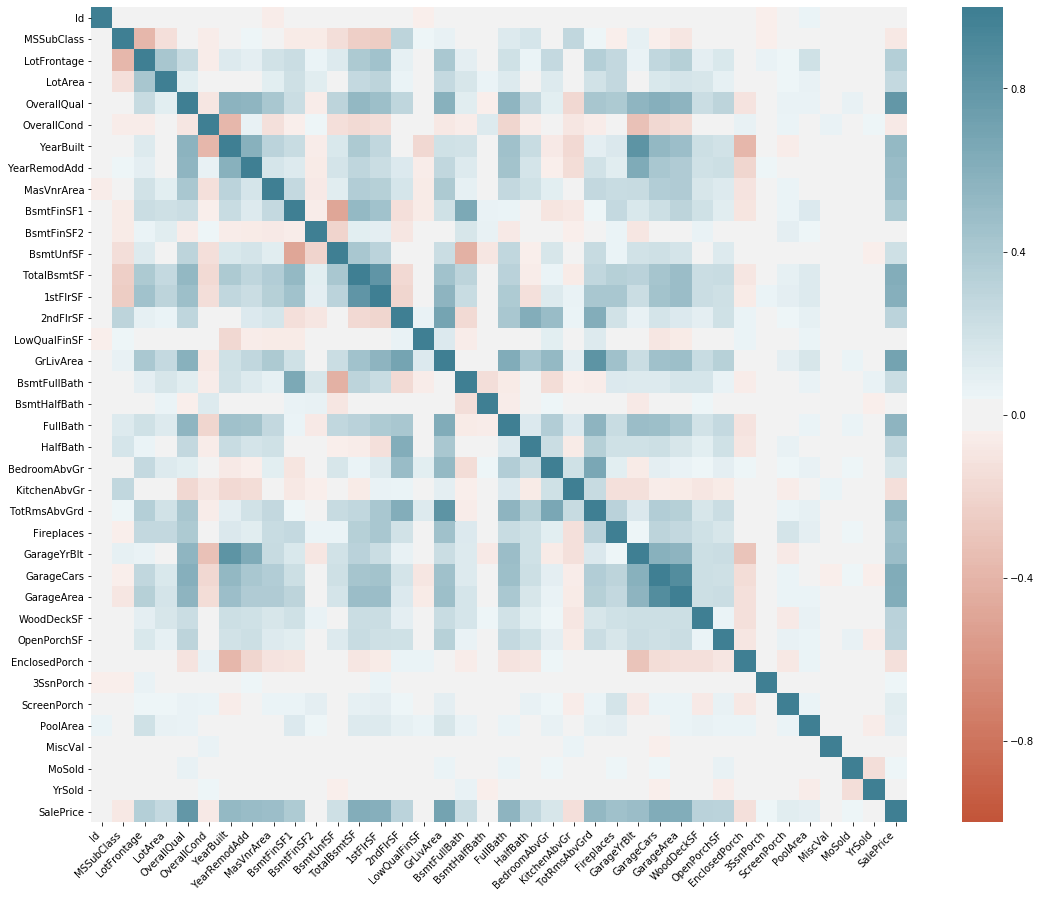

In [213]:
# Represent the correlation using Heat map
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

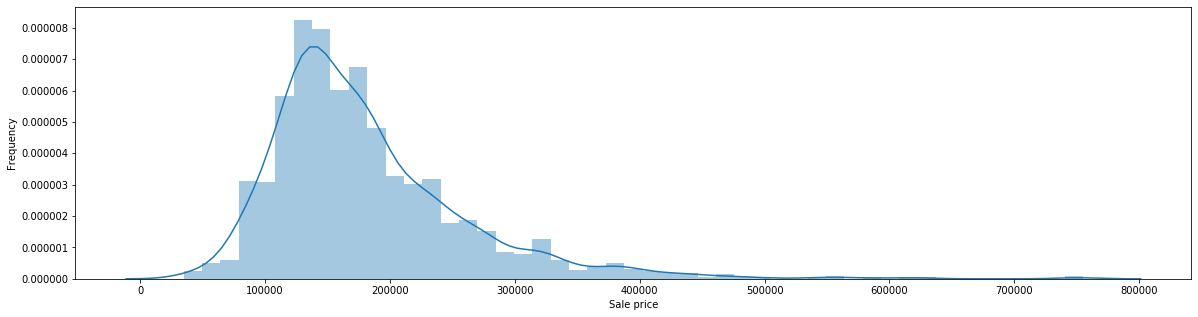

In [214]:
# Set up the matplotlib figure
plt.figure(figsize=(20,5))
sns.distplot(df['SalePrice'],kde=True)
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.show()

- Distribution is Positively Skewed. We will use Logrithmaic Transformation.

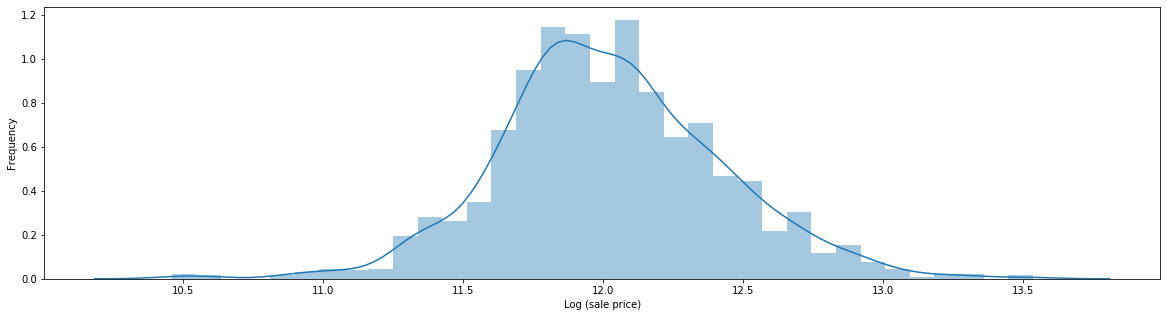

In [215]:
plt.figure(figsize=(20,5))
sns.distplot(np.log(df['SalePrice']),kde=True)
plt.xlabel('Log (sale price)')
plt.ylabel('Frequency')
plt.show()

The distribution is nearly normal. Therefore, we'll consider the Log SalePrice here onwards.

In [216]:
# Correlation with the price of the House
# Without Taking the ID
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

- First six features are the most positively correlated with the SalePrice (greater than 60%). We can not see good correlation between the rest of the features with the SalePrice

## Data Representation

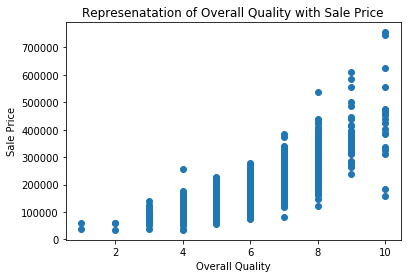

In [217]:
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Represenatation of Overall Quality with Sale Price')
plt.show()

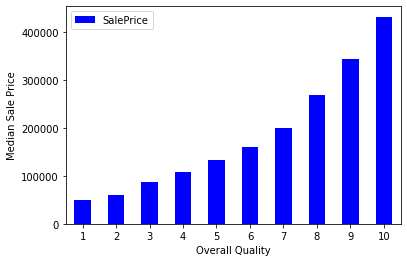

In [218]:
df.OverallQual.unique()
quality_pivot = df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

- As the Overall Quality increases, the sale price also increases

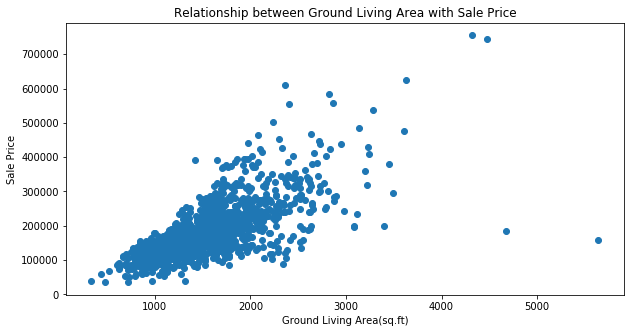

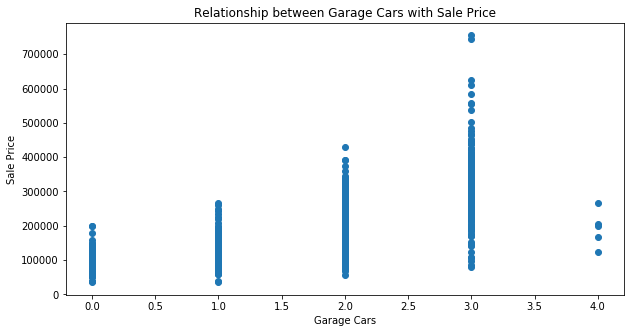

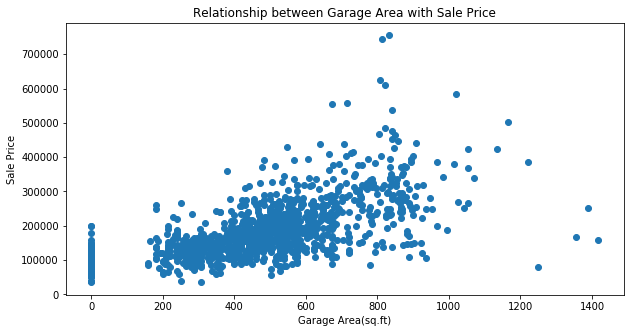

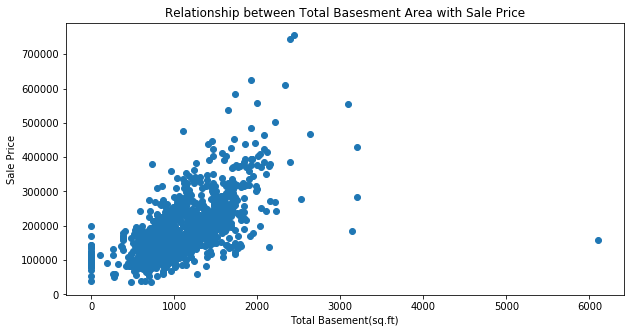

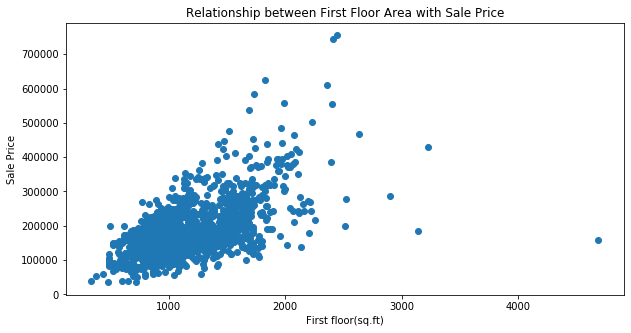

In [219]:
# Representation of Relationship between Ground Living Area with Sale Price
plt.figure(figsize=(10,5))
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Ground Living Area(sq.ft)')
plt.title('Relationship between Ground Living Area with Sale Price')
plt.show()

# Representation of Relationship between Garage Cars with Sale Price
plt.figure(figsize=(10,5))
plt.scatter(x=df['GarageCars'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Cars')
plt.title('Relationship between Garage Cars with Sale Price')
plt.show()

# Representation of Relationship between Garage Area with Sale Price
plt.figure(figsize=(10,5))
plt.scatter(x=df['GarageArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area(sq.ft)')
plt.title('Relationship between Garage Area with Sale Price')
plt.show()

# Represntation of Relationship between Total Basesment Area with Sale Price  
plt.figure(figsize=(10,5))
plt.scatter(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Total Basement(sq.ft)')
plt.title('Relationship between Total Basesment Area with Sale Price')
plt.show()
       
# Represntation of Relationship between First Floor Area with Sale Price
plt.figure(figsize=(10,5))
plt.scatter(x=df['1stFlrSF'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('First floor(sq.ft)')
plt.title('Relationship between First Floor Area with Sale Price')
plt.show()

- As the size of the Living Area increases corresponding Sale Price of the house also increases
- Garage Cars contains discrete values. By observing the chart, as the number of garage cars increases, the Sale Price of the house also increases
- There are many houses with no garage areas. As the size of the garagae area increases, corresponding sale price of the house also increases
- There are houses with no basements. As the Total area of the basement increases, Sale Price of the house also increases
- As the area of the first floor increases, the Sale price of the house also increases

In [220]:
numerical=df.select_dtypes(exclude=[np.number])
numerical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Feature Engineering

In [221]:
# Delete features with high number of missing values

df.drop(['PoolQC','Fence','MiscFeature','Alley', 'FireplaceQu'],axis=1,inplace=True)
df_test.drop(['PoolQC','Fence','MiscFeature','Alley', 'FireplaceQu'],axis=1,inplace=True)

# Drop the Id column
df.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

In [222]:
df.shape

(1460, 75)

In [223]:
df_test.shape

(1459, 74)

In [224]:
# Replacing Categorical Values using Mean

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())

df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

# Replacing Categorical Values using Mode

df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])

df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])

df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])

df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])

df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])

df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])

df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

- Since there are not millions of records but 1460 records we replaced all the null values present in numerical columns with the mean of that column and all the null values of present in categorical columns with the mode of that column

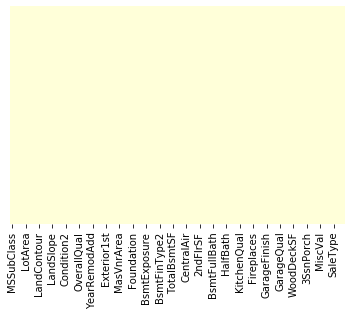

In [225]:
# Check if there are any more missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

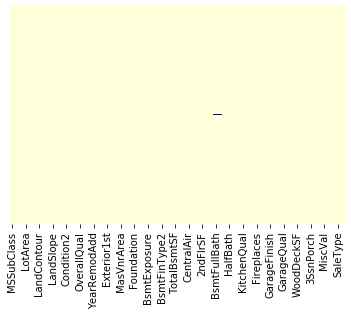

In [226]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [227]:
# if there are any other missing values drop them
df_test.dropna(inplace=True)

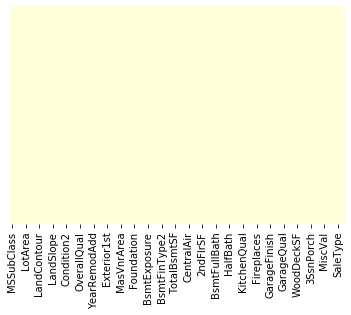

In [228]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [229]:
df.shape

(1460, 75)

In [230]:
df_test.shape

(1447, 74)

In [231]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [232]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [233]:
# Combine with test dat

final_df=pd.concat([df,df_test],axis=0)

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [234]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1428         NaN
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [235]:
final_df.shape

(2907, 75)

In [236]:
# Handle Categorical features

In [237]:
categorical_features = [column for column in df.columns if df[column].dtype == object]
print('Number of Categorical columns',len(categorical_features))
print(categorical_features)

Number of Categorical columns 38
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [238]:
numerical_features = [column for column in df.columns if df[column].dtype != object]
print('Number of Numerical Columns',len(numerical_features))
print(numerical_features)

Number of Numerical Columns 37
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [239]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final


In [240]:
final_df=category_onehot_multcols(categorical_features)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [241]:
final_df.shape

(2907, 233)

In [242]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [243]:
final_df.shape

(2907, 177)

In [245]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [246]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [247]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [248]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,1,0,0,0,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,1,0,0,0,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,1,0,0,0,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,1,0,0,0,1,0


In [249]:
df_Train.shape

(1460, 177)

In [250]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

G:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [252]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Model Creation and Evaluation

In [255]:
# Multiple Linear Regression Model with Ordinary Least Square Method

x = sm.add_constant(X_train)
results2 = sm.OLS(y_train,x).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     74.91
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:40:38   Log-Likelihood:                -16784.
No. Observations:                1460   AIC:                         3.392e+04
Df Residuals:                    1285   BIC:                         3.484e+04
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.674e+06   1.12e+06     -1.493      0.136   -3.87e+06    5.26e+05
1stFlrSF         12.0539      6.467      1.864      0.063      -0.633      24.740
2ndFlrSF         30.2570      5.743      5.268      0.000      18.990      41.524
3SsnPorch        50.3407     24.607      2.046      0.041       2.067      98.614
BedroomAbvGr  -5217.0859   1466.724     -3.557      0.000   -8094.522   -2339.650
BsmtFinSF1       17.7204      2.446      7.244      0.000      12.922      22.519
BsmtFinSF2        4.0841      3.875      1.054      0.292      -3.518      11.687
BsmtFullBath   2749.8398   2130.958      1.290      0.197   -1430.699    6930.379
BsmtHalfBath    -24.8939   3243.209     -0.008      0.994   -6387.460    6337.672
BsmtUnfSF        -3.3749      2.287     -1.475      0.140      -7.862       1.112
EnclosedPorch     7.9454     13.293      0.598      0.550     -18.134      34.024
Fireplaces     4500.7264   1450.958      3.102      0.002    1654.219    7347.234
FullBath       2994.5937   2362.702      1.267      0.205   -1640.583    7629.770
GarageArea        7.3497      8.259      0.890      0.374      -8.854      23.553
GarageCars     4909.0790   2351.573      2.088      0.037     295.736    9522.422
GarageYrBlt      88.2649     57.491      1.535      0.125     -24.521     201.051
GrLivArea        35.9961      5.780      6.228      0.000      24.657      47.336
HalfBath       1771.7578   2243.202      0.790      0.430   -2628.983    6172.498
KitchenAbvGr    -1.8e+04   5935.399     -3.033      0.002   -2.96e+04   -6358.483
LotArea           0.4770      0.112      4.251      0.000       0.257       0.697
LotFrontage      84.7260     46.622      1.817      0.069      -6.737     176.189
LowQualFinSF     -6.3148     14.307     -0.441      0.659     -34.382      21.753
MSSubClass      -72.6239     90.038     -0.807      0.420    -249.261     104.014
MasVnrArea       13.6335      6.253      2.180      0.029       1.366      25.901
MiscVal          -1.3988      1.491     -0.938      0.348      -4.325       1.527
MoSold         -661.4751    266.540     -2.482      0.013   -1184.376    -138.574
OpenPorchSF      11.7929     12.282      0.960      0.337     -12.301      35.887
OverallCond    5868.2935    895.714      6.552      0.000    4111.072    7625.515
OverallQual    7859.6145   1071.063      7.338      0.000    5758.390    9960.839
PoolArea         82.9071     19.296      4.297      0.000      45.051     120.763
ScreenPorch      37.3683     13.183      2.835      0.005      11.507      63.230
TotRmsAbvGrd   2608.2856   1010.138      2.582      0.010     626.585    4589.986
TotalBsmtSF      18.4297      3.422      5.386      0.000      11.717      25.143
WoodDeckSF       11.9201      6.305      1.891      0.059      -0.448      24.289
YearBuilt       280.6887     74.383      3.774   

In [267]:
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

classifier=XGBRegressor()
regressor=XGBRegressor()

In [268]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [269]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [270]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [271]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   25.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.0min finished
G:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
G:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:03:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [272]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [274]:
### Training With Regressor
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [275]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)